# Simple orders analysis

In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=True)

In [4]:
#Check shape of orders
# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))

In [5]:
# Inspect features
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_one_star,dim_is_five_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000
mean,12.513442,23.739059,0.753349,0.097651,0.592112,4.155509,1.141783,1.013914,136.692876,22.749945,600.673668
std,9.454868,8.766518,4.656587,0.296844,0.491445,1.285113,0.535848,0.123635,207.672996,21.517061,594.818600
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000,0.000000
25%,6.754850,18.326979,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.820000,187.199770
50%,10.203727,23.230556,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,85.990000,17.160000,433.943032
75%,15.659560,28.414525,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,149.900000,23.990000,797.505559
max,208.351759,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000,8736.947618


wait_time:


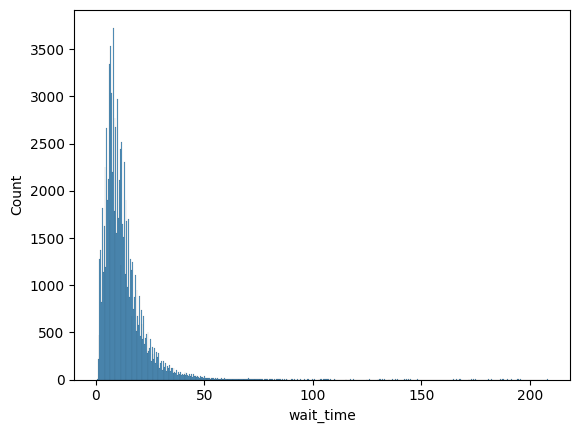

expected_wait_time:


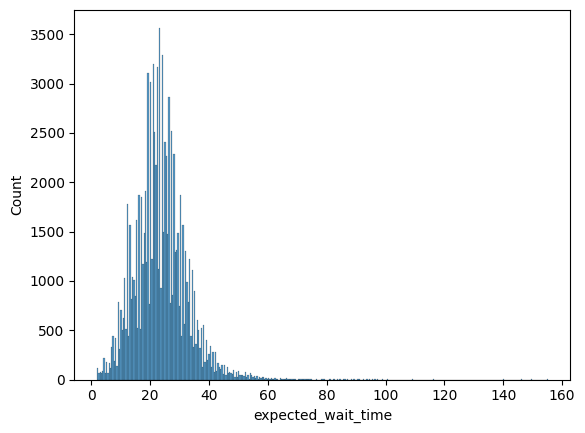

delay_vs_expected:


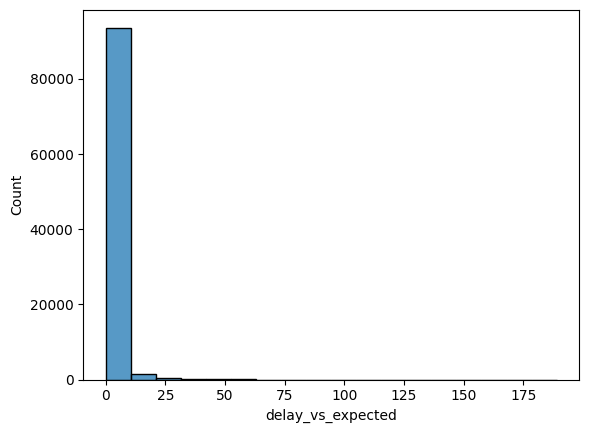

dim_is_one_star:


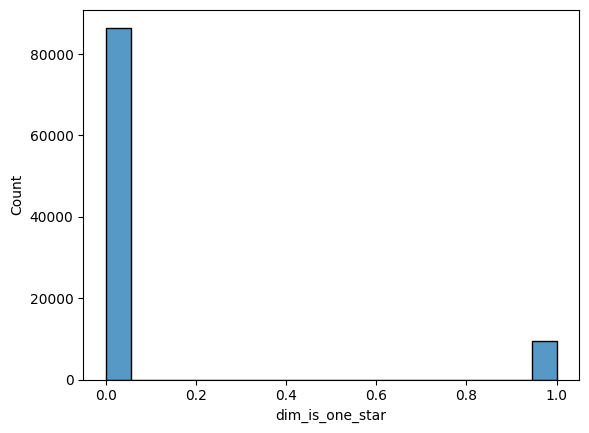

dim_is_five_star:


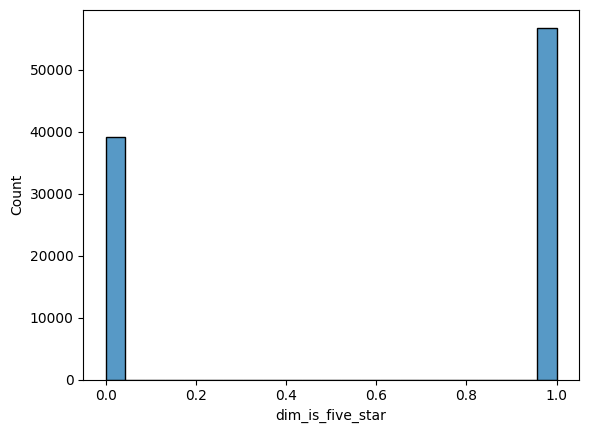

review_score:


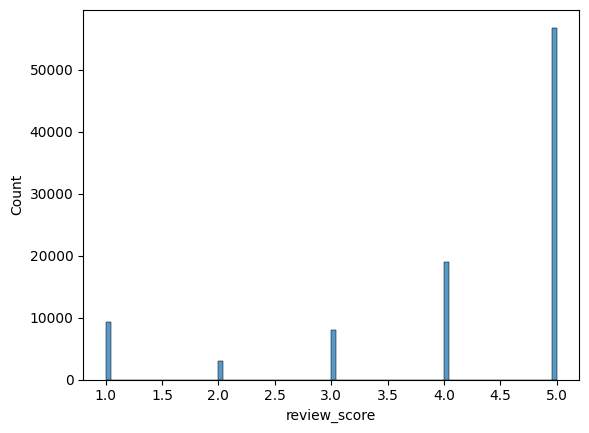

number_of_products:


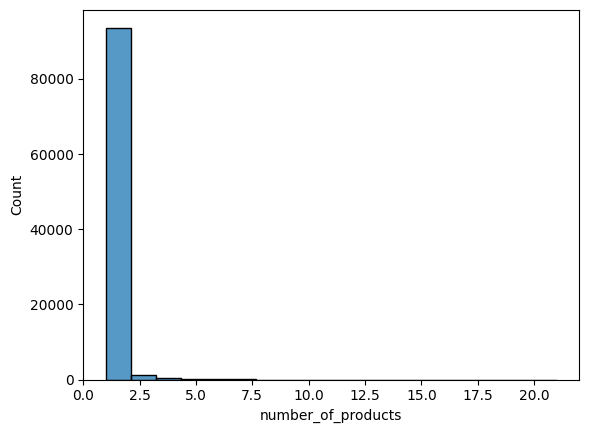

number_of_sellers:


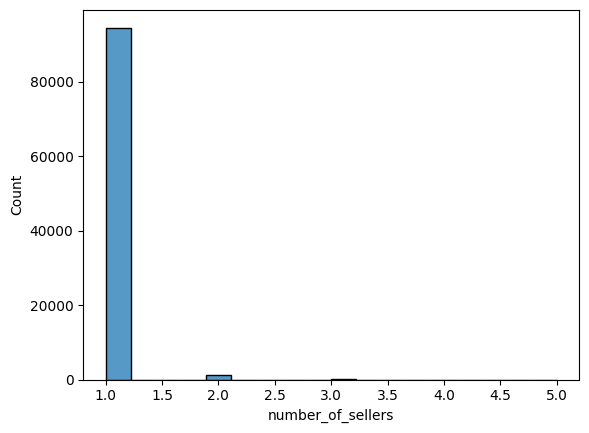

price:


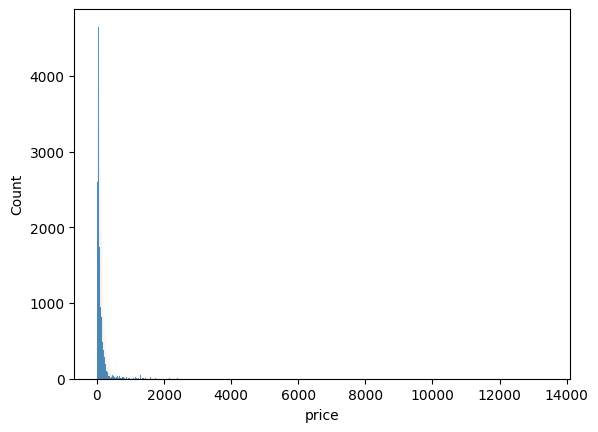

freight_value:


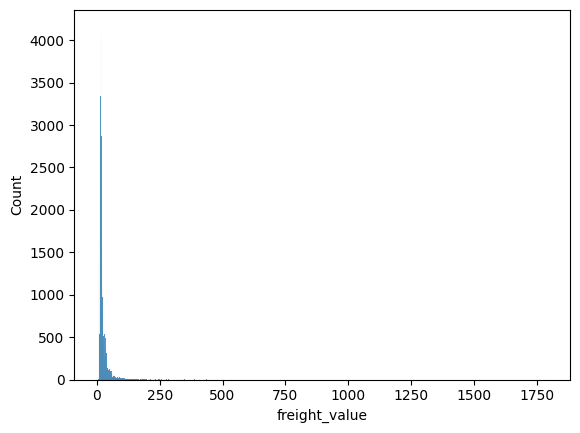

distance_seller_customer:


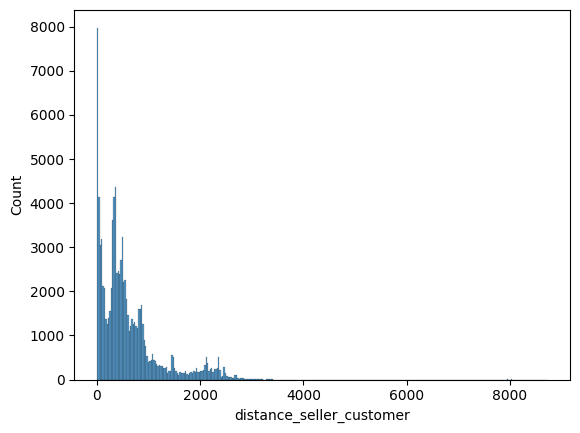

In [6]:
# Plot distribution for the numerical features  available in the dataset
for variable in orders.select_dtypes(exclude = ["object"]).columns:
    print(f"{variable}:")
    sns.histplot(orders[variable])
    plt.show()

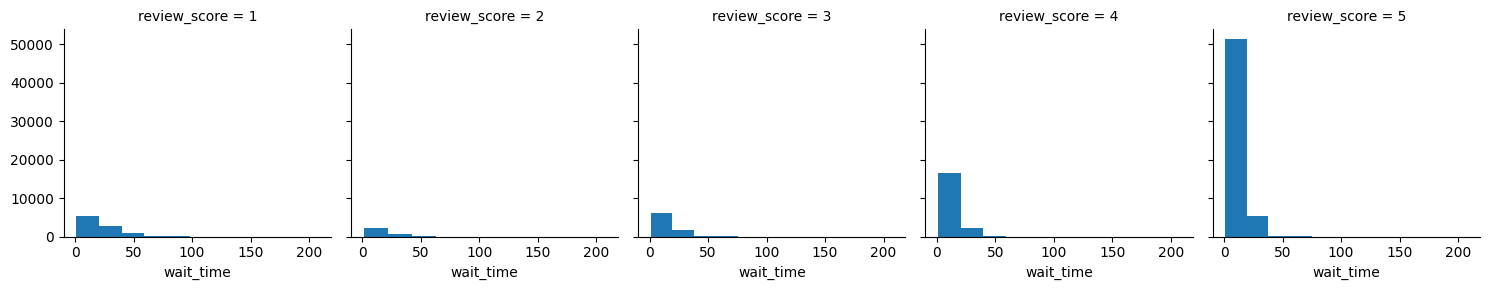

In [7]:
g = sns.FacetGrid(data=orders, col="review_score")
g.map(plt.hist, "wait_time")

<AxesSubplot:xlabel='price', ylabel='Density'>

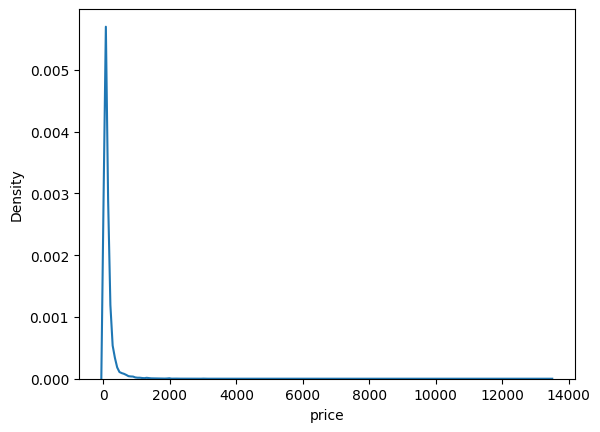

In [12]:
sns.kdeplot(orders['price'])

<AxesSubplot:xlabel='distance_sellers_customer', ylabel='Density'>

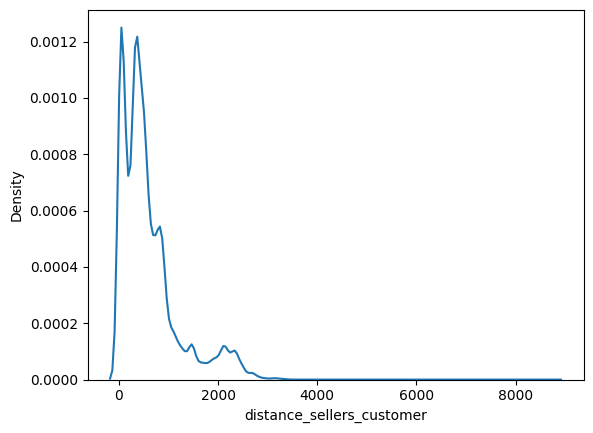

In [22]:
sns.kdeplot(orders['distance_sellers_customer'])

<AxesSubplot:>

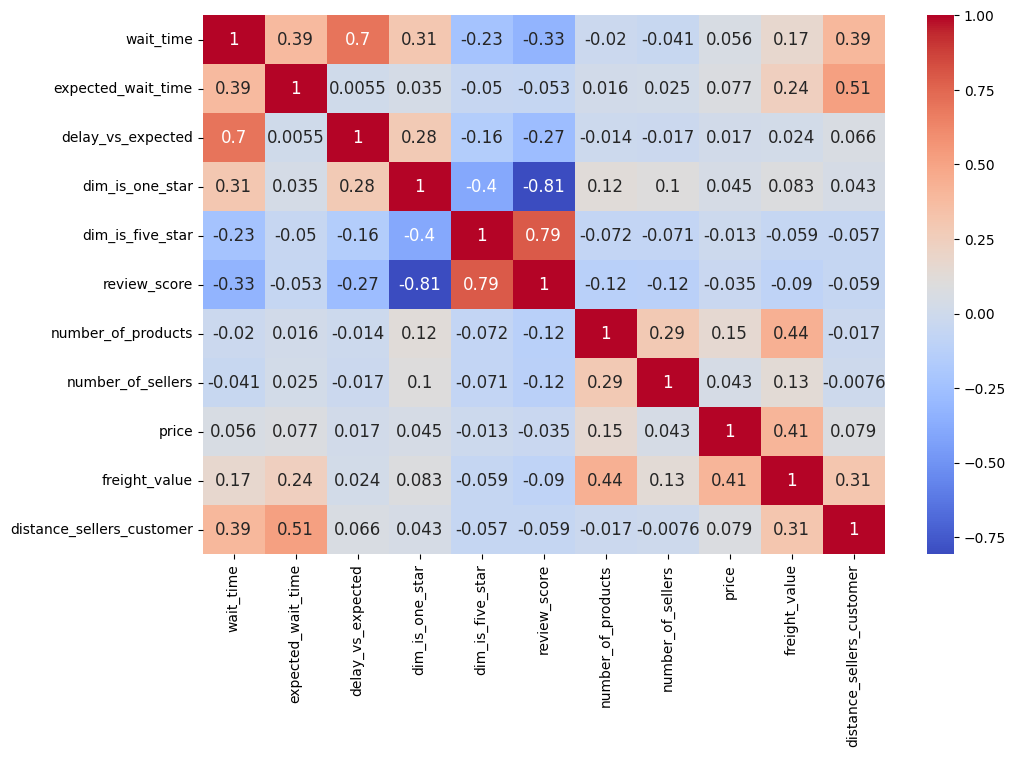

In [23]:
# Correlation plot 
plt.figure(figsize=(11,7))
sns.heatmap(orders.corr(), cmap='coolwarm', annot = True, annot_kws={"size": 12})

In [9]:
# Get correlation values from all features to the target variable `review_score`
round(orders.corr()['review_score'],2)

wait_time                  -0.33
expected_wait_time         -0.05
delay_vs_expected          -0.27
dim_is_one_star            -0.81
dim_is_five_star            0.79
review_score                1.00
number_of_products         -0.12
number_of_sellers          -0.12
price                      -0.03
freight_value              -0.09
distance_seller_customer   -0.06
Name: review_score, dtype: float64

In [11]:
# Get absolute correlation values from all features to the target variable `review_score`
round(np.abs(orders.corr()['review_score']).sort_values(ascending = False),2)

review_score                1.00
dim_is_one_star             0.81
dim_is_five_star            0.79
wait_time                   0.33
delay_vs_expected           0.27
number_of_products          0.12
number_of_sellers           0.12
freight_value               0.09
distance_seller_customer    0.06
expected_wait_time          0.05
price                       0.03
Name: review_score, dtype: float64

In [12]:
sample = orders.sample(10000, random_state=42)

(0.0, 5.832684943832611)

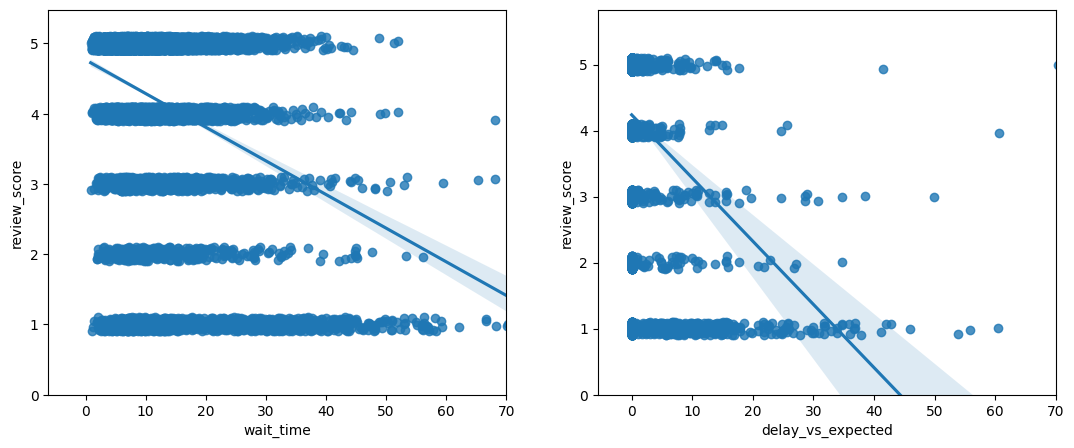

In [13]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = sample.delay_vs_expected, y= sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

Text(0.5, 1.0, 'Full dataset (100000 datapoints), Confidence Interval 99%')

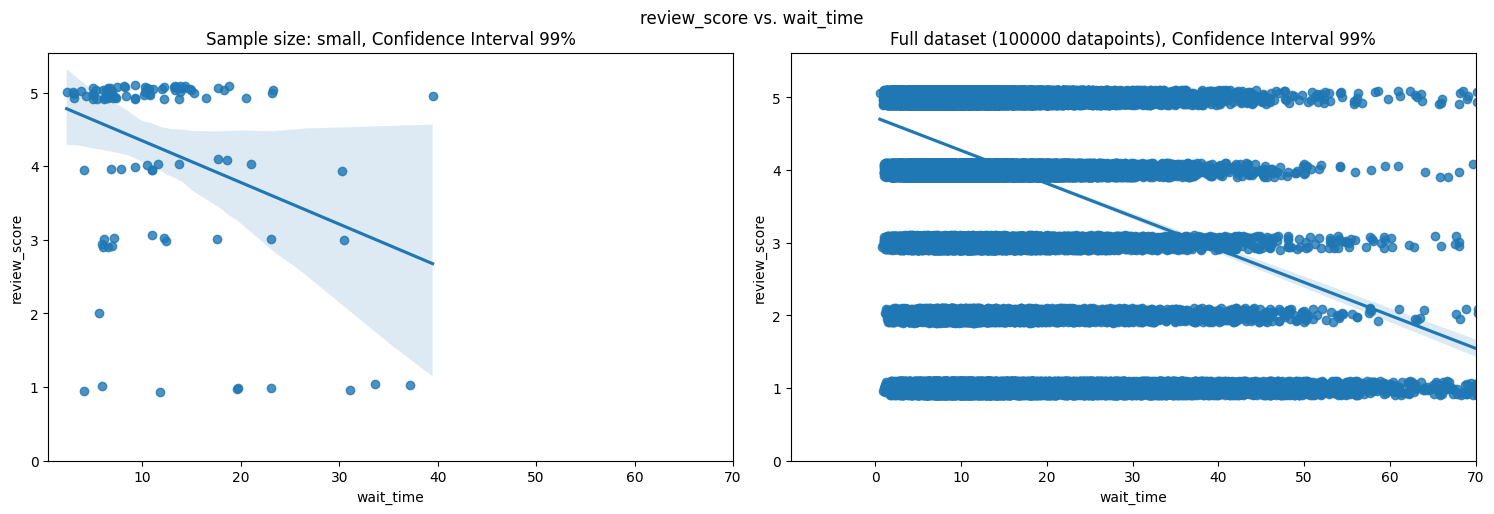

In [14]:
sample = orders.sample(100, random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

fig.suptitle('review_score vs. wait_time')
fig.tight_layout()

sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=99, ax = axes[0])
axes[0].set_xlim(right=70)
axes[0].set_ylim(bottom=0)
axes[0].set_title("Sample size: small, Confidence Interval 99%")


sns.regplot(x = orders.wait_time, y= orders.review_score, y_jitter=.1, ci=99, ax = axes[1])
axes[1].set_xlim(right=70)
axes[1].set_ylim(bottom=0)
axes[1].set_title("Full dataset (100000 datapoints), Confidence Interval 99%")